<a href="https://colab.research.google.com/github/prazbond00/Mr.bond00/blob/main/main_plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [4]:
!pip install kaggle

In [5]:
kaggle_credentails = json.load(open("kaggle.json"))


In [6]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]


In [7]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.03G/2.04G [00:19<00:00, 226MB/s]
100% 2.04G/2.04G [00:19<00:00, 113MB/s]


In [8]:

!ls



kaggle.json  plantvillage-dataset.zip  sample_data


In [9]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [10]:
import os

# Listing the contents of the main dataset directory
print(os.listdir("plantvillage dataset"))

# Counting and previewing the contents of the 'segmented' subdirectory
print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

# Counting and previewing the contents of the 'color' subdirectory
print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

# Counting and previewing the contents of the 'grayscale' subdirectory
print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['segmented', 'grayscale', 'color']
38
['Tomato___Late_blight', 'Potato___Early_blight', 'Pepper,_bell___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Potato___healthy']
38
['Tomato___Late_blight', 'Potato___Early_blight', 'Pepper,_bell___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Potato___healthy']
38
['Tomato___Late_blight', 'Potato___Early_blight', 'Pepper,_bell___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Potato___healthy']


In [11]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])


423
['feb2cf1a-1903-4fb8-bc99-4b399346fef0___Mt.N.V_HL 6135.JPG', '369f23fe-c093-4655-a9f2-0aae0918eb26___Mt.N.V_HL 6102.JPG', '12331981-d038-4eb0-a1c6-64b27f226cab___Mt.N.V_HL 6106.JPG', '0cd6cdbd-1674-4abb-b734-756da4994cd0___Mt.N.V_HL 6052.JPG', '4a31039d-54b1-4a0f-bc5f-2032f94c27af___Mt.N.V_HL 9040.JPG']


In [12]:
# Dataset Path for data preprocessing
base_dir = 'plantvillage dataset/color'


In [13]:
import os
import shutil

# Base directory path
base_dir = '/content/plantvillage dataset/color'

# Keywords to filter folders (capitalized)
keywords = ["APPLE", "BLUEBERRY", "CHERRY", "GRAPE", "ORANGE", "PEACH", "RASPBERRY", "SQUASH", "STRAWBERRY"]

# List all folders in the base directory
folders = [folder for folder in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, folder))]

# Filter and remove folders that start with any of the specified keywords (case-sensitive)
for folder in folders:
    if any(folder.upper().startswith(keyword) for keyword in keywords):  # Check if name starts with a keyword
        folder_path = os.path.join(base_dir, folder)
        print(f"Removing folder: {folder_path}")
        shutil.rmtree(folder_path)  # Remove the folder and its contents

print("Folders removed successfully!")


Removing folder: /content/plantvillage dataset/color/Cherry_(including_sour)___healthy
Removing folder: /content/plantvillage dataset/color/Grape___healthy
Removing folder: /content/plantvillage dataset/color/Strawberry___healthy
Removing folder: /content/plantvillage dataset/color/Strawberry___Leaf_scorch
Removing folder: /content/plantvillage dataset/color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Removing folder: /content/plantvillage dataset/color/Grape___Esca_(Black_Measles)
Removing folder: /content/plantvillage dataset/color/Orange___Haunglongbing_(Citrus_greening)
Removing folder: /content/plantvillage dataset/color/Squash___Powdery_mildew
Removing folder: /content/plantvillage dataset/color/Cherry_(including_sour)___Powdery_mildew
Removing folder: /content/plantvillage dataset/color/Peach___healthy
Removing folder: /content/plantvillage dataset/color/Apple___healthy
Removing folder: /content/plantvillage dataset/color/Raspberry___healthy
Removing folder: /content/plantvillage

In [14]:
import os
import matplotlib.image as mpimg

# Specify the directory
directory_path = '/content/plantvillage dataset/color/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
# List all files in the directory
files = os.listdir(directory_path)

# Filter for image files (optional, based on extensions)
image_files = [f for f in files if f.endswith(('.png', '.jpg', '.jpeg'))]

if image_files:
    # Pick the first image (or loop through them as needed)
    image_path = os.path.join(directory_path, image_files[0])

    # Read the image
    img = mpimg.imread(image_path)
    print(img)
else:
    print("No image files found in the directory.")


[[[204 187 159]
  [203 186 158]
  [207 190 162]
  ...
  [139 112  82]
  [159 133 100]
  [125  99  66]]

 [[217 200 172]
  [219 202 174]
  [223 206 178]
  ...
  [132 105  75]
  [116  90  57]
  [132 108  74]]

 [[227 210 184]
  [220 203 177]
  [213 196 170]
  ...
  [124  99  68]
  [142 117  86]
  [114  91  59]]

 ...

 [[134 131  98]
  [110 107  74]
  [101  98  65]
  ...
  [129 123 123]
  [130 124 124]
  [131 125 125]]

 [[119 123  90]
  [111 117  83]
  [100 106  72]
  ...
  [128 122 122]
  [128 122 122]
  [128 122 122]]

 [[104 111  77]
  [123 130  96]
  [121 131  97]
  ...
  [122 116 116]
  [119 113 113]
  [117 111 111]]]


In [15]:
# Image Parameters
img_size = 224
batch_size = 32

In [16]:
## train test split
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [17]:

# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 25390 images belonging to 20 classes.


In [18]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 6339 images belonging to 20 classes.


In [19]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           5,140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,800,532 (182.34 MB)

 Trainable params: 47,800,532 (182.34 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])





In [21]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


793/793 ━━━━━━━━━━━━━━━━━━━━ 2776s 3s/step - accuracy: 0.6047 - loss: 2.0168 - val_accuracy: 0.8539 - val_loss: 0.4495
Epoch 2/5
793/793 ━━━━━━━━━━━━━━━━━━━━ 4s 153us/step - accuracy: 0.7812 - loss: 0.3696 - val_accuracy: 1.0000 - val_loss: 0.1363
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


793/793 ━━━━━━━━━━━━━━━━━━━━ 2816s 4s/step - accuracy: 0.9009 - loss: 0.2914 - val_accuracy: 0.8449 - val_loss: 0.5321
Epoch 4/5
793/793 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.7812 - loss: 0.5565 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 5/5
793/793 ━━━━━━━━━━━━━━━━━━━━ 2791s 3s/step - accuracy: 0.9573 - loss: 0.1274 - val_accuracy: 0.8673 - val_loss: 0.4381


In [22]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
198/198 ━━━━━━━━━━━━━━━━━━━━ 165s 828ms/step - accuracy: 0.8660 - loss: 0.4346
Validation Accuracy: 86.71%


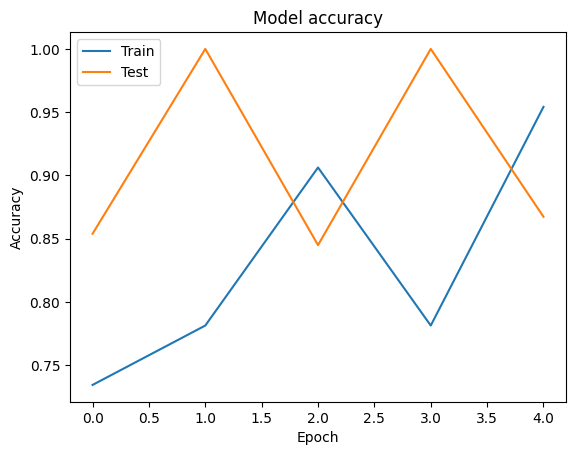

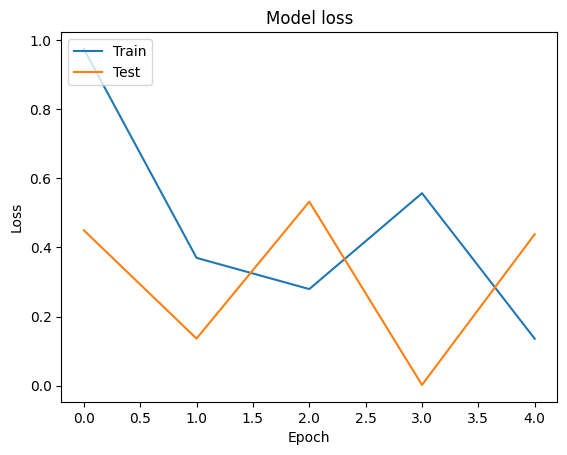

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [25]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [26]:
class_indices

{0: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 1: 'Corn_(maize)___Common_rust_',
 2: 'Corn_(maize)___Northern_Leaf_Blight',
 3: 'Corn_(maize)___healthy',
 4: 'Pepper,_bell___Bacterial_spot',
 5: 'Pepper,_bell___healthy',
 6: 'Potato___Early_blight',
 7: 'Potato___Late_blight',
 8: 'Potato___healthy',
 9: 'Soybean___healthy',
 10: 'Tomato___Bacterial_spot',
 11: 'Tomato___Early_blight',
 12: 'Tomato___Late_blight',
 13: 'Tomato___Leaf_Mold',
 14: 'Tomato___Septoria_leaf_spot',
 15: 'Tomato___Spider_mites Two-spotted_spider_mite',
 16: 'Tomato___Target_Spot',
 17: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 18: 'Tomato___Tomato_mosaic_virus',
 19: 'Tomato___healthy'}

In [27]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [28]:
# Example Usage
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Predicted Class Name: Corn_(maize)___Northern_Leaf_Blight


In [29]:
model.save('plant_disease_prediction_model.h5')

In [30]:
# prompt: model.save('drive/plant_disease_prediction_model.h5')

model.save('/content/drive/MyDrive/plant_disease_prediction_model.h5')